<a href="https://colab.research.google.com/github/Akshay069/Netflix-Movies-And-TV-shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Netflix Movies and TV Shows Clustering**

---



---






* Project type - Clustering, content based recommender system
* Contribution- Individual

**Index:**


1.   Problem statement
2.   Data Overview
3.   Data Cleaning
4.   Exploratory data analysis
5.   Data preprocessing
6.   Clusters impelementation
7.   Building content based recommender system
8.   Conclusions







## **1. Problem Statement:**

---


* This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

* In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

* Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

### <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



##**2. Data Overview:**


---



In [95]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [96]:
# Mounting Google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
# Reading CSV file using Pandas DataFrame.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Machine Learning/Unsupervised Learning /Unsupervised Capstone Project/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [98]:
# Seeing datset for the fisrt time.
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [99]:
# Last five observations of the dataset.
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [100]:
# Shape of the dataset.
print('- There are total of', df.shape[0], 'number of rows in the dataset')
print('- There are total of', df.shape[1], 'number of columns in the dataset')

- There are total of 7787 number of rows in the dataset
- There are total of 12 number of columns in the dataset


In [101]:
# Exploring the total 12 columns name in the dataset.
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

###**Attribute Information**


1.   **show_id :** Unique ID for every Movie / Tv Show \
2.   **type :** Identifier - A Movie or TV Show \
3.   **title :** Title of the Movie / Tv Show \
4.   **director :** Director of the Movie \
5.   **cast :** Actors involved in the movie / show \
6.   **country :** Country where the movie / show was produced \
7.   **date_added :** Date it was added on Netflix \
8.   **release_year :** Actual Releaseyear of the movie / show \
9.   **rating :** TV Rating of the movie / show \
10.  **duration :** Total Duration - in minutes or number of seasons \
11.  **listed_in :** Genres of content \
12.  **description:** The Summary description of content











* Listed_in is nothing but a genre so, for better understanding let's change its name to genres.

In [102]:
# Changing listed_in to genres.
df.rename(columns = {"listed_in":"genres"},inplace = True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [103]:
# Let's see the summary information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


* Most of the variables are Qualitative i.e Categorical.
* Above we can see that date_added is in string also in the 'October 19, 2020' formate Lets take year and month out for further EDA.
* But before doing any changes in the dataset let's make its copy.
* Variable 'show_id' is not important for us so, will drop this variable.

##**3. Data Cleaning:**

---

In [104]:
# Creating copy of the dataset so that I could make changes on it.
Netflix_df = df.copy()

* As disscused above will extract and make new column 'Added Year' and 'Added Month' from column 'date_added'.

In [105]:
#adding columns of month and year of addition
Netflix_df['added_year'] = pd.DatetimeIndex(Netflix_df['date_added']).year
Netflix_df['added_month'] = pd.DatetimeIndex(Netflix_df['date_added']).month_name()
Netflix_df.drop(columns='show_id', inplace=True)
Netflix_df.head()

type  title           director  \
0  TV Show     3%                NaN   
1    Movie   7:19  Jorge Michel Grau   
2    Movie  23:59       Gilbert Chan   
3    Movie      9        Shane Acker   
4    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  added_year added_month  
0  In a future where the elite inhabit an island ...      2020.0      August  
1  After a devastating earthquake hits Mexico Cit...      2016.0    December  
2  When an army recruit is found dead, his fellow...      2018.0    December  
3  In a postapocalyptic world, rag-doll robots hi...      2017.0    November  
4  A brilliant group of students become card-coun...      2020.0     January

In [106]:
# Checking for the duplicate values.
df.duplicated().sum()

0

* There are no duplicates present in our dataset.

In [107]:
# Checking of null values in the dataset.
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

* We can see that there are null values present in four colomns which needed to be treated will treat them further in this section.

<BarContainer object of 12 artists>

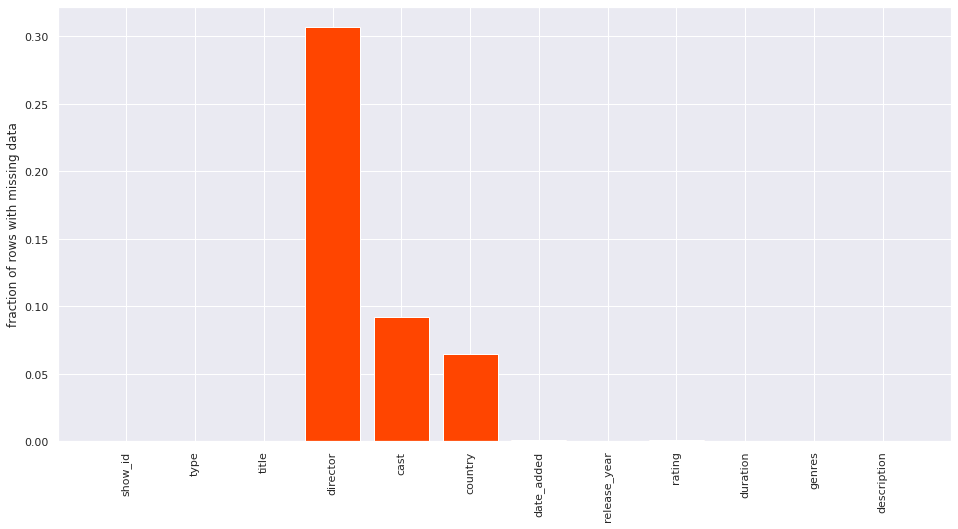

In [108]:
# Let's take visual of it.
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts, color='orangered')

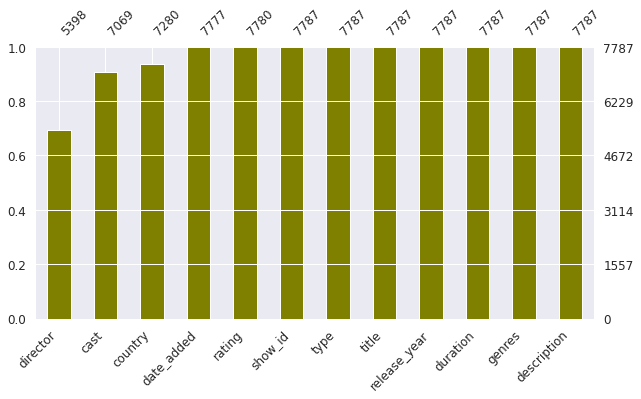

In [109]:
# Visualization null value distribution.
import missingno as msno
msno.bar(df, log=False, sort='ascending', figsize=(10,5), fontsize=12, color='olive')

* We can clearly see that there are null values present in some of the features including director, cast, country, date_added and rating.
* We have almost 30% of values as null in director, Country and Cast so instead of dropping I'm  replacing  those values with string 'Not Known'
* I'm dropping other null values from column date_added and rating as there null value count is very less.

In [110]:
# Treating null values as disscused.
Netflix_df['country'] = Netflix_df['country'].fillna('Not Known')
Netflix_df['director'] = Netflix_df['director'].fillna('Not Known') 
Netflix_df['cast'] = Netflix_df['cast'].fillna('Not Known')
Netflix_df.dropna(subset=['date_added','rating'],inplace=True)

In [111]:
# Checking for results.
Netflix_df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
added_year      0
added_month     0
dtype: int64

In [112]:
# Checking for some comma ended values.
Netflix_df[Netflix_df['country'].str.endswith(",")]

type          title               director  \
1402  Movie    City of Joy        Madeleine Gavin   
2315  Movie          Funan               Denis Do   
2827  Movie  Hotel Pacific        Janusz Majewski   
7433  Movie        Virunga  Orlando von Einsiedel   

                                                   cast  \
1402                                          Not Known   
2315  Bérénice Bejo, Louis Garrel, Colette Kieffer, ...   
2827  Marek Kondrat, Roman Wilhelmi, Roman Skamene, ...   
7433                                          Not Known   

                                     country         date_added  release_year  \
1402                          United States,  September 7, 2018          2018   
2315  France, Belgium, Luxembourg, Cambodia,      July 18, 2020          2018   
2827                                 Poland,    October 1, 2019          1975   
7433                         United Kingdom,   November 7, 2014          2014   

     rating duration                                        genres  \
1402  TV-MA   77 min                                 Documentaries   
2315  TV-14   87 min                  Dramas, International Movies   
2827  TV-MA   96 min  Classic Movies, Dramas, International Movies   
7433  TV-MA  100 min           Documentaries, International Movies   

                                            description  added_year  \
1402  Women who've been sexually brutalized in war-t...      2018.0   
2315  Separated from their young son during the brut...      2020.0   
2827  A motivated teen strives to rise from dishwash...      2019.0   
7433  The Oscar-nominated true story of the rangers ...      2014.0   

     added_month  
1402   September  
2315        July  
2827     October  
7433    November

* I obeserved some that there are some entries where there are comma present in the end of the country name.

In [113]:
# As discussed above let's fill these values with related genres.
Netflix_df.loc[1402,'country'] = 'United States'
Netflix_df.loc[2315,'country'] = 'France, Belgium, Luxembourg, Cambodia'
Netflix_df.loc[2827,'country'] = 'Poland'
Netflix_df.loc[7433,'country'] = 'United Kingdom'

In [114]:
# Let's check again.
Netflix_df[Netflix_df['country'].str.endswith(",")]

Empty DataFrame
Columns: [type, title, director, cast, country, date_added, release_year, rating, duration, genres, description, added_year, added_month]
Index: []

In [115]:
# Lets figure out all the categorical variables in
Categorical_Features = [feature for feature in Netflix_df.columns if Netflix_df[feature].dtypes == 'O']
Categorical_Features

['type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'rating',
 'duration',
 'genres',
 'description',
 'added_month']

In [116]:
# Number of categories in each categorical variable.
for feature in Categorical_Features:
  print('The variable is {} and number of categories are {}'.format(feature,len(Netflix_df[feature].unique())))

The variable is type and number of categories are 2
The variable is title and number of categories are 7770
The variable is director and number of categories are 4048
The variable is cast and number of categories are 6818
The variable is country and number of categories are 679
The variable is date_added and number of categories are 1563
The variable is rating and number of categories are 14
The variable is duration and number of categories are 216
The variable is genres and number of categories are 491
The variable is description and number of categories are 7752
The variable is added_month and number of categories are 12


In [117]:
# All the unique genres.
all_genres = ""
for i in Netflix_df['genres'].value_counts().index.values:
  all_genres  = all_genres + "," + i
all_genres = all_genres.split(',')
genres = [s.strip() for s in all_genres]
genres = np.unique(genres)
genres = list(genres)
print("Combined unique Genres' List : \n ")
genres.pop(0)
genres

Combined unique Genres' List : 
 


['Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers']

* Here, We have seperated all the categorical values to do analysis of them.
* Also there are large number of Nominal categorical variables excepting 'Type', 'Rating', 'Gneres', 'added_month' are ordinal type of categorical variables so will analyse these features one by one.

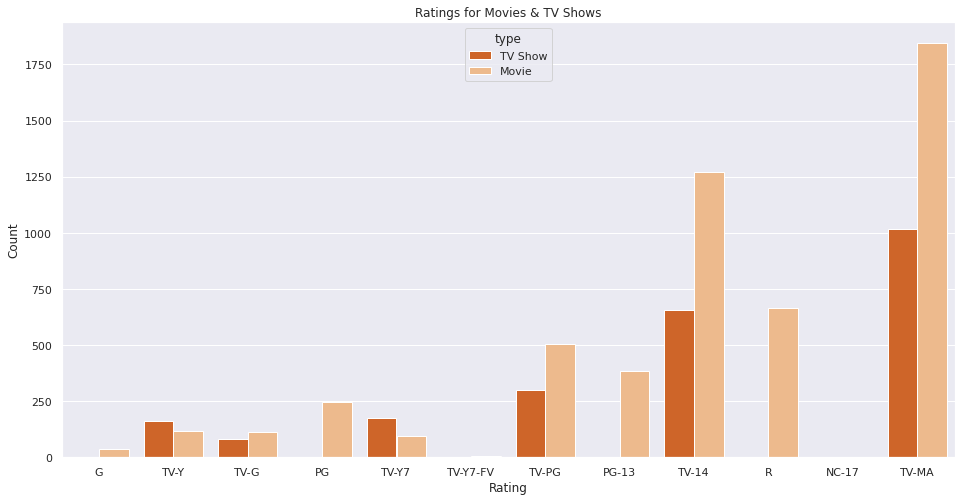

In [118]:
# Rating for Movies and TV shows
order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(16,8))
g = sns.countplot(Netflix_df['rating'], hue=Netflix_df.type, order=order, palette="Oranges_r");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

* TV-MA and TV-14 these two rating are higher in number.
* Also the rating categories given in the dataset is not understandable so let's find the alternate for them.
* After the research on the internet will come with below alternates. so, will replace it with them.

In [119]:
# Changing the values in the rating column.
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

Netflix_df['rating'].replace(rating_map, inplace = True)
Netflix_df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

##**4. Exploratory Data Analysis:**

---



> **4.1 Univariate Analysis.**



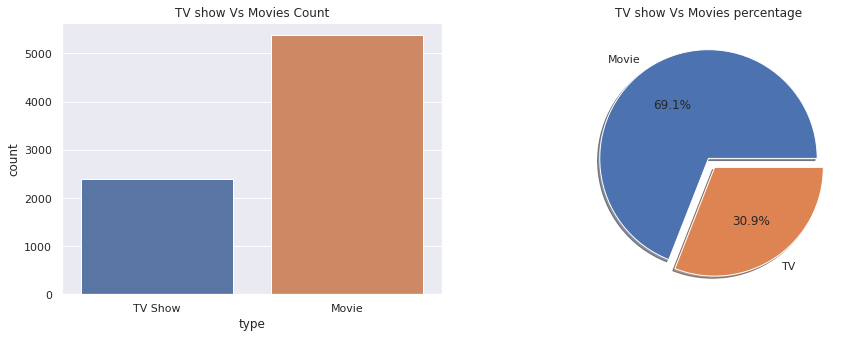

In [120]:
# Let's see which type has more content
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(Netflix_df['type'])
plt.title('TV show Vs Movies Count')
plt.subplot(122)
plt.pie(df['type'].value_counts(),labels=['Movie', 'TV'], explode = (0,0.1), autopct = '%1.1f%%', shadow=True)
plt.title('TV show Vs Movies percentage')
plt.show()

* Number of movies are more as compared to TV shows on netflix.

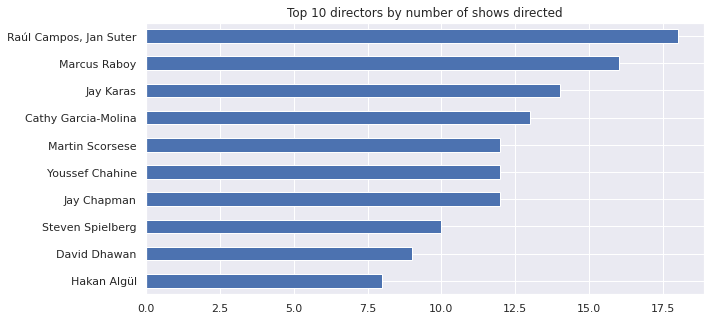

In [121]:
# Top 10 directors on the basis of count of their films/shows
plt.figure(figsize=(10,5))
Netflix_df[~(Netflix_df['director']=='Not Known')].director.value_counts().nlargest(10).sort_values(ascending= True).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')
plt.show()

* Raul Campos and Jan Suter together have directed almost 18 movies / TV shows, higher than anyone in the dataset.

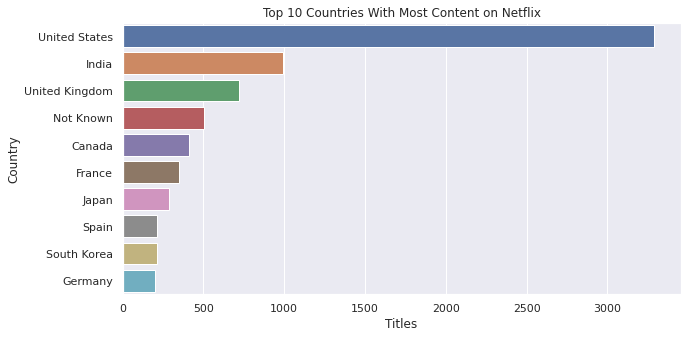

In [122]:
# Top 10 Countries with most content on netflix. 
filtered_countries = Netflix_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(10,5))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:10])
plt.title('Top 10 Countries With Most Content on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

* The highest number of movies / TV shows were based out of the United States, followed by India and United Kingdom.

In [123]:
# % share of movies / tv shows by top 3 countries
round(Netflix_df.country.value_counts().nlargest(3).sum()/len(df)*100, 2)

51.05

In [124]:
# % share of movies / tv shows by top 10 countries
round(Netflix_df.country.value_counts().nlargest(10).sum()/len(df)*100,2)

68.14

* The top 3 countries together account for about 51% of all movies and TV shows in the dataset.
* This value increases to about 68% for top ten countries.

In [125]:
# Changing Data type of variable added_year to integer from float.
Netflix_df['added_year']=Netflix_df['added_year'].astype('int64') # Changing Data type of 'added_year' variable to integer from float.

# Creating DataFrame to store content added on netflix every year.
year_df = pd.DataFrame(Netflix_df.groupby(['added_year','type'])['type'].count())
year_df.rename(columns={'added_year':'movies and tv shows','type':'Total Count'},inplace=True)
year_df.reset_index()

added_year     type  Total Count
0         2008    Movie            1
1         2008  TV Show            1
2         2009    Movie            2
3         2010    Movie            1
4         2011    Movie           13
5         2012    Movie            3
6         2013    Movie            6
7         2013  TV Show            5
8         2014    Movie           19
9         2014  TV Show            6
10        2015    Movie           58
11        2015  TV Show           30
12        2016    Movie          256
13        2016  TV Show          184
14        2017    Movie          861
15        2017  TV Show          361
16        2018    Movie         1255
17        2018  TV Show          429
18        2019    Movie         1497
19        2019  TV Show          656
20        2020    Movie         1312
21        2020  TV Show          697
22        2021    Movie           88
23        2021  TV Show           29

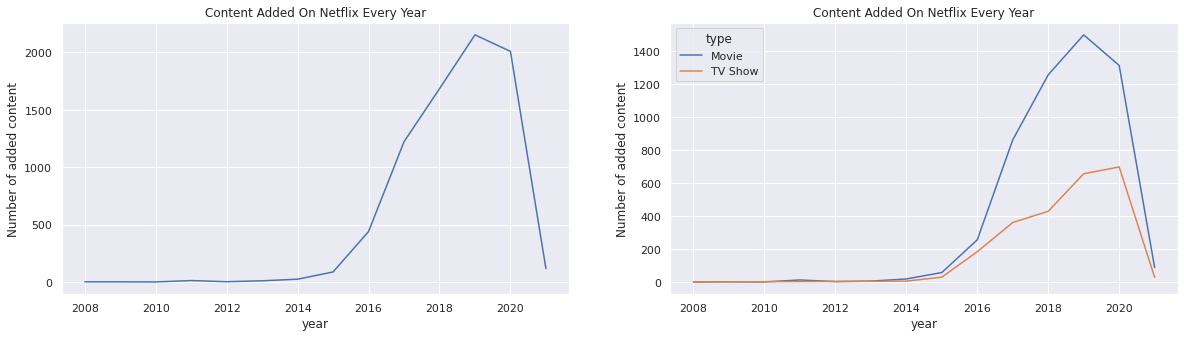

In [126]:
# Ploting to see the content added on netflix every year.
plt.figure(figsize=(20,5))
plt.subplot(121)
Netflix_df.groupby(['added_year'])['type'].count().plot()
plt.xlabel('year')
plt.ylabel('Number of added content')
plt.title('Content Added On Netflix Every Year')
plt.subplot(122)
sns.lineplot(x='added_year', y='Total Count', data=year_df, hue='type')
plt.xlabel('year')
plt.ylabel('Number of added content')
plt.title('Content Added On Netflix Every Year')
plt.show()

* Netflix continuous to add more shows on its platform over the years.
* There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.
* But at the same time if we observe that TV shows added more in these years, so we can say that the netflix is adding more TV shows from 2019 than the movies still not clear from this plot will look for it further.

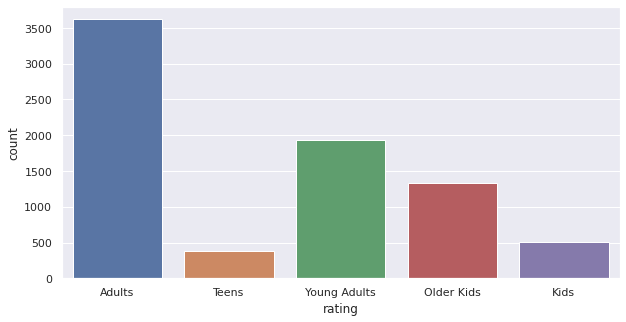

In [127]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=Netflix_df)

* The majority of the shows on Netflix are catered to the needs of adult and young adult population.
* And this is considerable also beacause now on adults are more in nummber and consuming lots of content on ott than other age groups.



> **4.2. Bivariate Analysis.**



In [128]:
# Choosing the primary country and primary genre to simplify the analysis
Netflix_df['country'] = Netflix_df['country'].apply(lambda x: x.split(',')[0])
Netflix_df['genres'] = Netflix_df['genres'].apply(lambda x: x.split(',')[0])

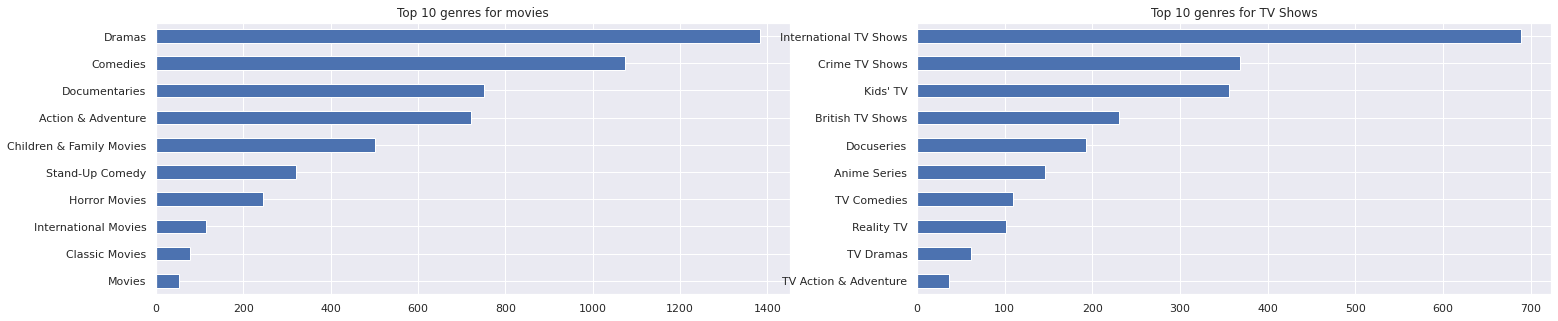

In [129]:
# Top 10 genre for movies
plt.figure(figsize=(25,5))
plt.subplot(121)
Netflix_df[Netflix_df['type']=='Movie'].genres.value_counts().nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.title('Top 10 genres for movies')

# Top 10 genre for tv shows
plt.subplot(122)
Netflix_df[Netflix_df['type']=='TV Show'].genres.value_counts().nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')
plt.show()

* Dramas, comedies, and documentaries are the most popular genre for the movies on Netflix.
* International, crime, and kids are the most popular genre for TV shows on Netflix.

In [130]:
# Seperating most common genres in the form of binary values for better analysis.
netflix_data = Netflix_df.copy()
netflix_data['Action & Adventure'] = netflix_data['genres'].apply(lambda x: 1 if 'Action & Adventure' in x  else 0)
netflix_data['Anime'] = netflix_data['genres'].apply(lambda x: 1 if 'Anime' in x  else 0)
netflix_data['Children & Family'] = netflix_data['genres'].apply(lambda x: 1 if 'Children & Family' in x  else 0)
netflix_data['Classic'] = netflix_data['genres'].apply(lambda x: 1 if 'Classic' in x  else 0)
netflix_data['Comedy'] = netflix_data['genres'].apply(lambda x: 1 if 'Comedy' in x or 'Comedies' in x else 0)
netflix_data['Crime'] = netflix_data['genres'].apply(lambda x: 1 if 'Crime' in x  else 0)
netflix_data['Documentaries'] = netflix_data['genres'].apply(lambda x: 1 if 'Documentaries' in x  else 0)
netflix_data['Horror'] = netflix_data['genres'].apply(lambda x: 1 if 'Horror' in x  else 0)
netflix_data['Romantic'] = netflix_data['genres'].apply(lambda x: 1 if 'Romantic' in x  else 0)
netflix_data['Science'] = netflix_data['genres'].apply(lambda x: 1 if 'Sci-Fi' in x or 'Science' in x else 0)
netflix_data['Thriller'] = netflix_data['genres'].apply(lambda x: 1 if 'Thriller' in x  else 0)
netflix_data['Drama'] = netflix_data['genres'].apply(lambda x: 1 if 'Drama' in x  else 0)

* Now, we will see in the next step the count of movies and TV shows available in neflix with respet to the different genres.

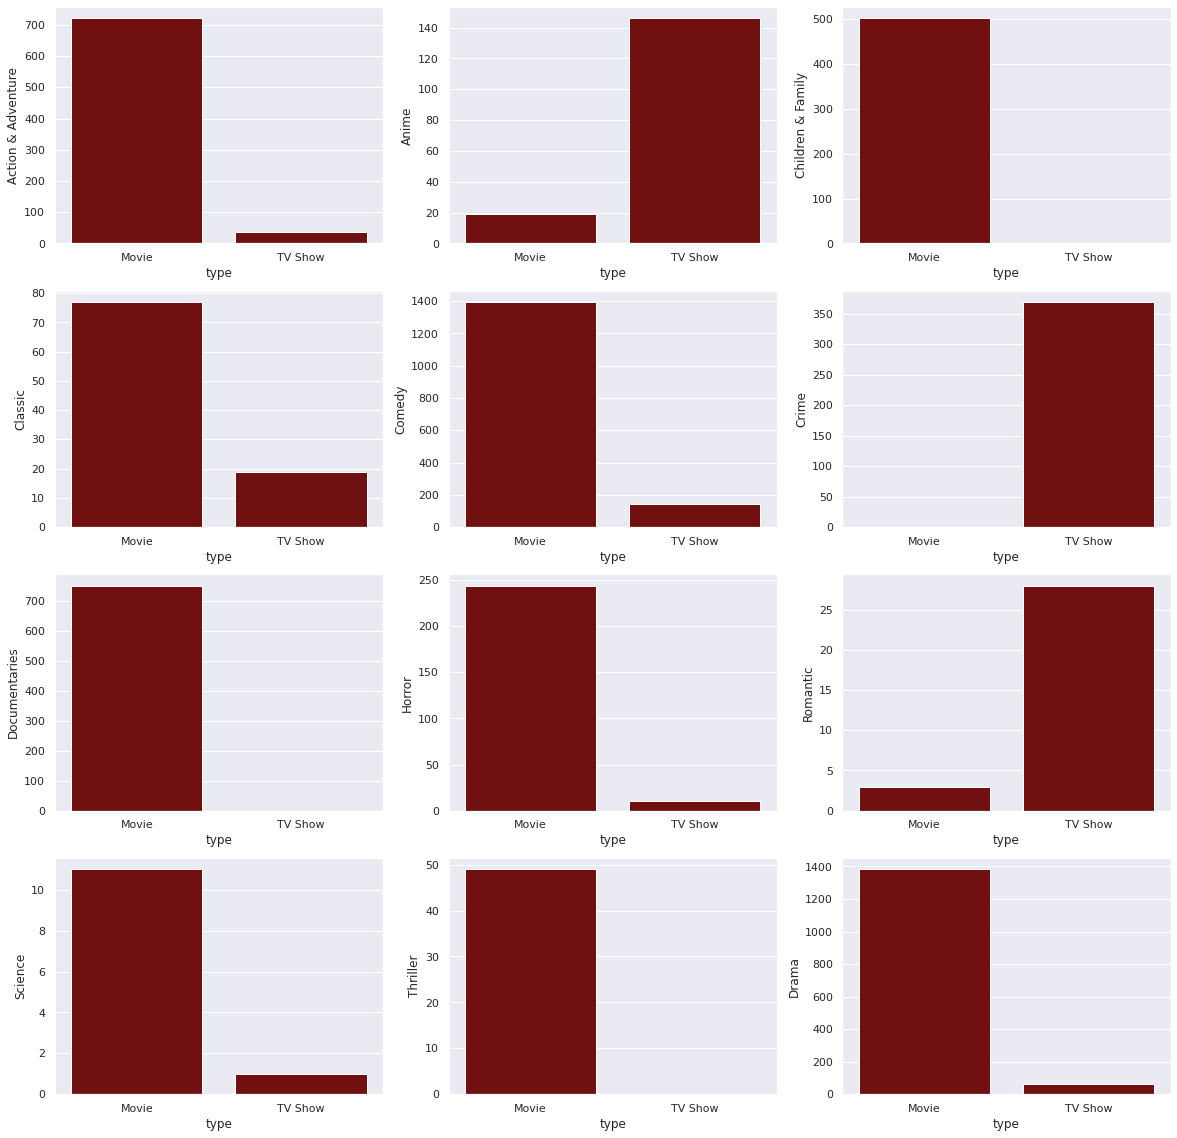

In [131]:
# Let's see the number of content available with respect to diffetent genres.
genres1= ['Action & Adventure','Anime','Children & Family','Classic','Comedy','Crime','Documentaries','Horror','Romantic','Science','Thriller','Drama']
plt.figure(figsize=(20,20))
for index,feature in enumerate(genres1):
    df2 =pd.DataFrame(netflix_data.groupby('type')[feature].sum()).reset_index()
    ax = plt.subplot(4,3,index+1)
    sns.barplot(x='type',y= feature, data=df2, color= 'maroon')
    plt.title('')

* Genres like 'Anime' and 'Crime' has more number of TV shows than movies.
* As we know movies content is more on netflix, thus the movies for different genres is also high in number.
* Genres like 'Documentaries' and 'Children and Family' no tv shows available only movies are there.

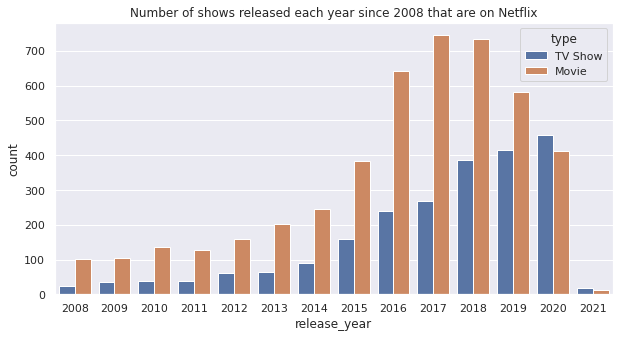

In [132]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
sns.countplot(x='release_year',data=df, hue='type',order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('release_year')
plt.show()

* Over the years, Netflix has consistently focused on adding more shows in its platform.
* Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.
* This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

##**5. Data Preprocessing**

---
###**Modeling Approach**

1.   Select the attributes based on which you want to cluster the shows
2.   Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase.
3.   Lemmatization to generate a meaningful word out of corpus of words
4.   Tokenization of corpus
5.   Word vectorization
6.   Dimensionality reduction
7.   Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
8.   Build optimal number of clusters and visualize the contents of each
9.   cluster using wordclouds.


In [133]:
# Fillin null with string.
df.fillna('',inplace=True)

In [134]:
# Using Original Dataset for clustering purpose.
dataset = df.copy()

# Combining all the clustering attributes to make a single text column on which clustering has been done.

dataset['clustering_attributes'] = (dataset['director'] + ' ' + 
                                dataset['cast'] +' ' + 
                                dataset['country'] +' ' + 
                                dataset['genres'] +' ' + 
                                dataset['description'])

* Clustering colunms attributes are choosed on the basis of the texual data variable present in the dataset.
* Problem statement is to do content based clustering so for which Combining all the texual data present in the dataset into a column and the do the clustering 

In [135]:
# Let's see what we got.
dataset['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

* We have sucsessfully added all the required data into one single column.



### **5.1 Text Preprocessing:**



**Remove all non ASCII charactors.**
* ASCII stands for the “American Standard Code for Information Interchange”. It was designed in the early 60’s, as a standard character set for computers and electronic devices. ASCII is a 8-bit or 1 bytes character set containing 127 characters
* Non ASCII are those spacial charactets from 128 to 255.
* Words like Gülmez, Taş, Papuççuoğlu contails these charactors which will need to eliminate.

In [136]:
# function to remove non-ascii characters
def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize(u'NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') # in python default string encoding is UTF-8
        new_words.append(new_word)
    return new_words

In [137]:
# remove non-ascii characters
dataset['clustering_attributes'] = remove_non_ascii(dataset['clustering_attributes'])

In [138]:
dataset['clustering_attributes'][40]

'Muharrem Gulmez Erdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz Ozerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

* We have successfully removed all non-ascii characters from the corpus

###**5.2 Removing Stopwords:**

In [139]:
# extracting the stopwords from nltk library
s_words = stopwords.words('english')
# displaying the stopwords
np.array(s_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [140]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in s_words]
    # joining the list of words with space separator
    return " ".join(text)

In [141]:
# Removing stop words
dataset['clustering_attributes'] = dataset['clustering_attributes'].apply(stopwords)

In [142]:
dataset['clustering_attributes'][40]

'muharrem gulmez erdem yener, ayhan tas, emin olcay, muharrem gulmez, elif nur kerkuk, tark papuccuoglu, suzan aksoy, doga konakoglu, esin eden, deniz ozerman turkey comedies, international movies slacker owner public bath house rallies community save big developer comes town close open new mall.'

* We have successfully removed all the stopwords and converted the corpus to lowercase.

###**5.3 Removing Punctuations:**

In [143]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [144]:
# Removing punctuation marks
dataset['clustering_attributes'] = dataset['clustering_attributes'].apply(remove_punctuation)

In [145]:
dataset['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

* We have successfully dropped all the punctuation marks from the corpus

###**5.4 Word Lemmatization:**

In [146]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [147]:
# Lemmatization
dataset['clustering_attributes'] = lemmatize_verbs(dataset['clustering_attributes'])

In [148]:
dataset['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

* We have lemmatized the corpus

In [149]:
tokenizer = TweetTokenizer()

dataset['clustering_attributes'] = dataset['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

* The corpus is converted to tokens.

###**5.5. Word Vectorization:**

In [150]:
# clustering tokens saved in a variable
clustering_data = dataset['clustering_attributes']

In [151]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tf_idf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tf_idf.fit_transform(clustering_data)

In [152]:
X

<7787x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 235288 stored elements in Compressed Sparse Row format>

In [153]:
# Shape of X
X.shape

(7787, 20000)

In [154]:
# data type of vector
type(X)

scipy.sparse.csr.csr_matrix

In [155]:
# convert X into array form for clustering
X = X.toarray()

###**5.6. Dimensionality reduction using PCA:**

In [156]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

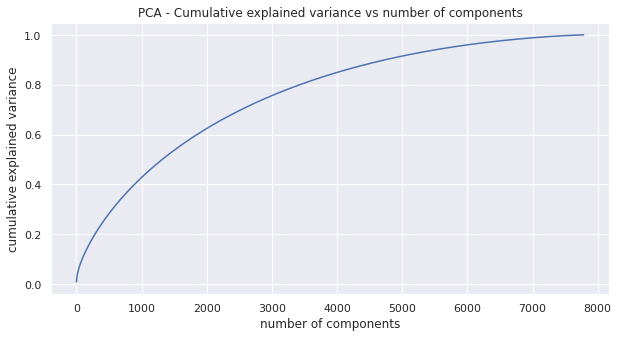

In [157]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

* We find that 100% of the variance is explained by about ~7500 components.
* Also, more than 80% of the variance is explained just by 4000 components.
* Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance

In [158]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [159]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

* We have successfully reduced the dimensionality of data using PCA.

###**6. Clustering model Implementation:**



> **6.1. K - Means Clustering**



Text(0, 0.5, 'WCSS')

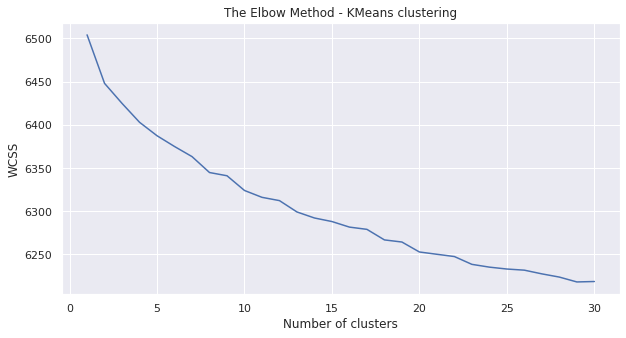

In [161]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

* The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters

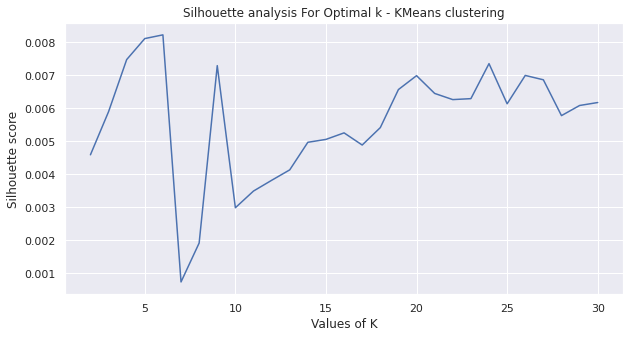

In [162]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

* The highest Silhouette score is obtained for 6 clusters.

In [163]:
# Clustering the data into six clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=33)

In [164]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6374.780433241605, 0.008224786779743122)


In [165]:
# Adding a kmeans cluster number attribute
dataset['kmeans_cluster'] = kmeans.labels_

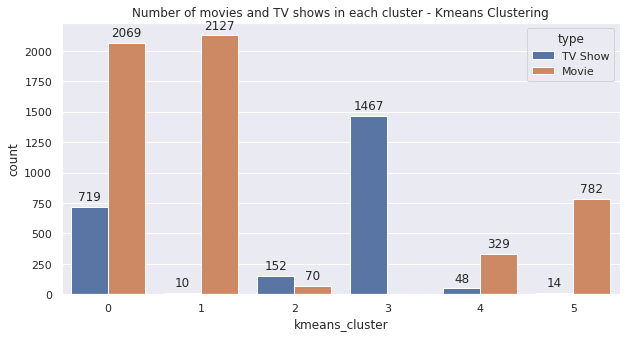

In [166]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=dataset, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

* Successfully built 6 clusters using the k-means clustering algorithm.



> **6.1.1 Let's build world cloud for different clusters.**



In [167]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in dataset[dataset['kmeans_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image  
  plt.figure(figsize = (10,5), facecolor = None)                    
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

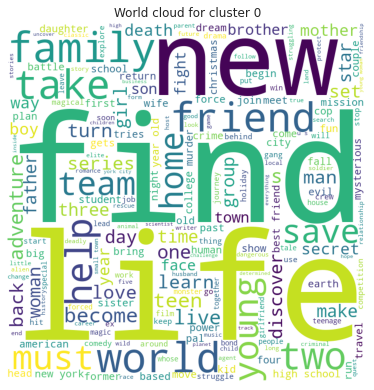

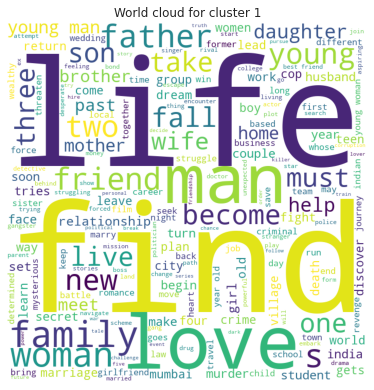

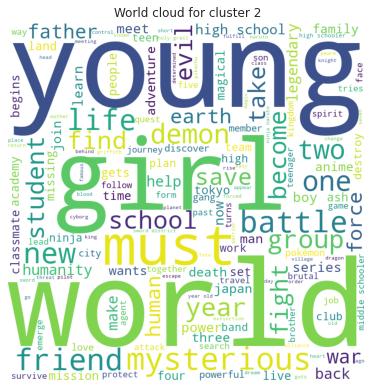

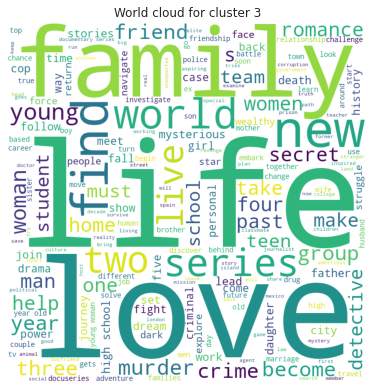

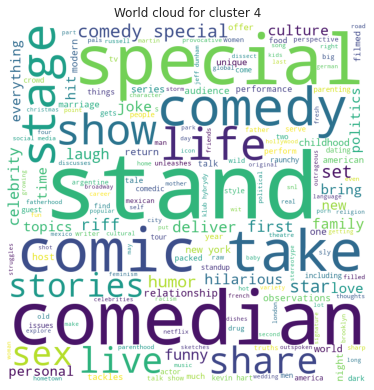

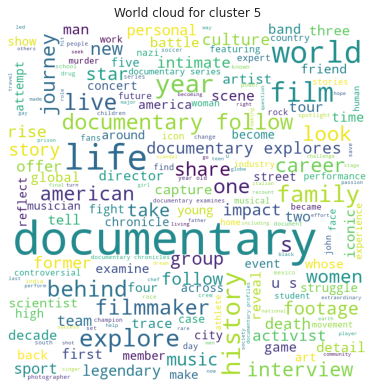

In [189]:
# Wordcloud for cluster 0

for i in range(6):
  kmeans_worldcloud(i)
  plt.title(f'World cloud for cluster {i}')
  plt.show()

* Keywords observed in cluster 0 : life, new, family, friend, save, help, discover, home, teen
* Keywords observed in cluster 1: life, love, family, father, young, girl, man, woman, friend, daughter.
* Keywords observed in cluster 2: young, world, girl, mysterious, humanity, life, student, school, battle, demon, force.
* Keywords observed in cluster 3: love, life, family, romance, crime, murder, world, adventure.
* Keywords observed in cluster 4: comedian, special, stand, comic, stage, sex, joke.
* Keywords observed in cluster 5: documentary, world, life, filmmaker, american, life.

### **6.2 Hierarchical Clustering**

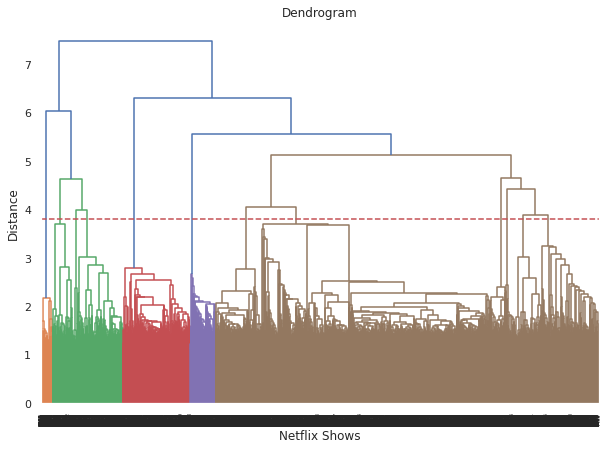

In [169]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

* At a distance of 3.8 units, 12 clusters can be built using the agglomerative clustering algorithm.

In [170]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x_pca)

array([3, 5, 1, ..., 4, 2, 4])

In [171]:
# Adding a hierarchical  cluster number attribute
dataset['hierarchical_cluster'] = hierarchical.labels_

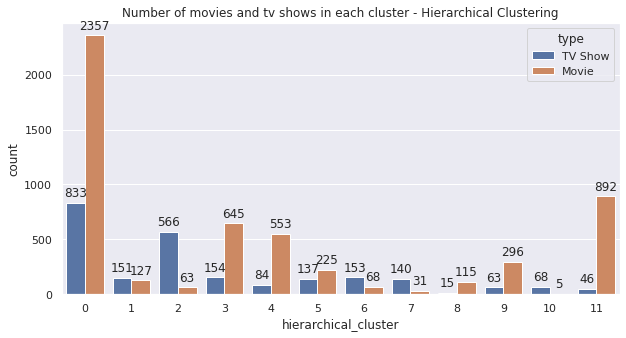

In [172]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=dataset, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

* Successfully built 12 clusters using the Agglomerative (hierarchical) clustering algorithm.

**6.2.1. Building WordCloud for Hierarchical Clustering.**

In [173]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in dataset[dataset['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

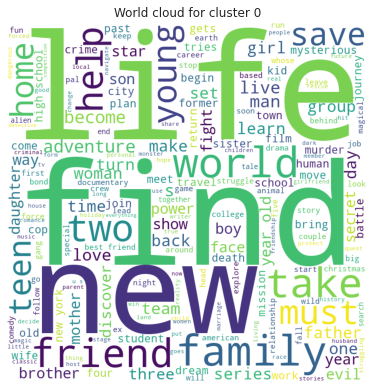

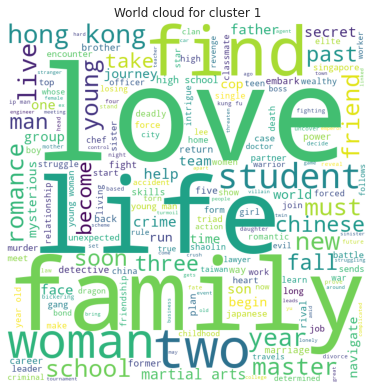

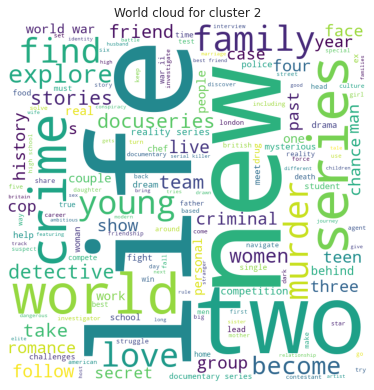

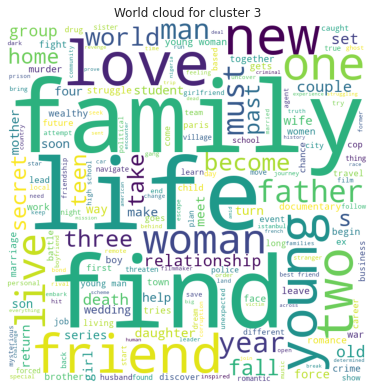

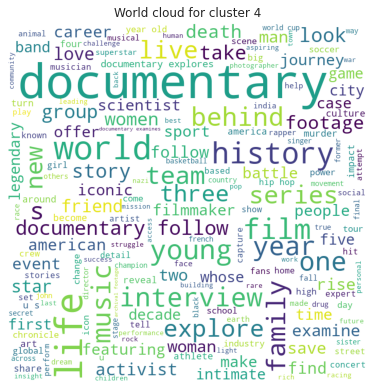

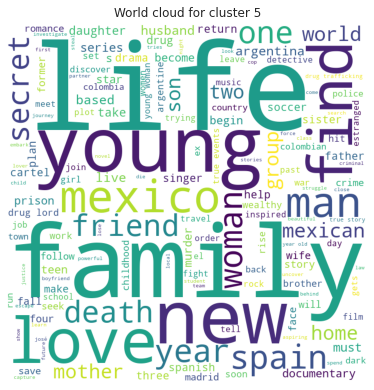

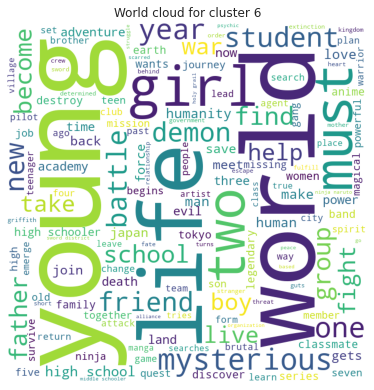

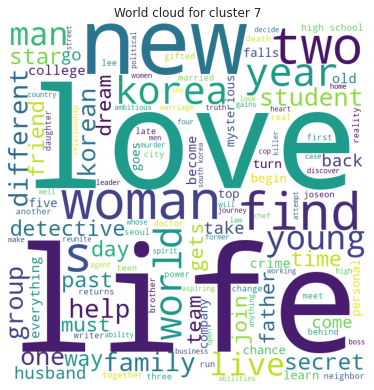

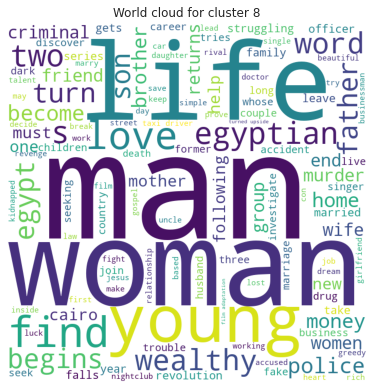

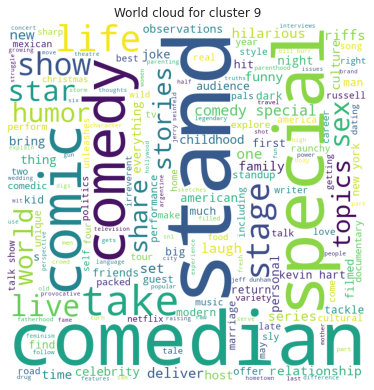

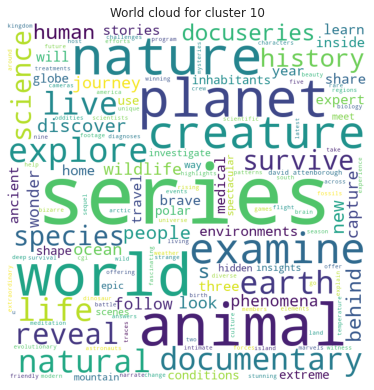

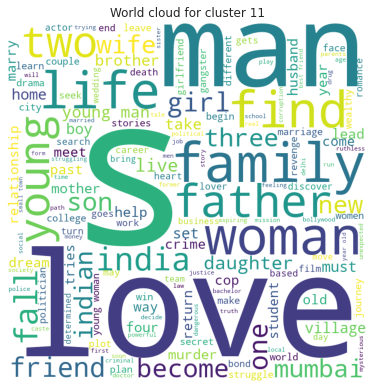

In [174]:
# Applying world cloud function to all the clusters.
for i in range(12):
  hierarchical_worldcloud(i)
  plt.title(f'World cloud for cluster {i}')
  plt.show()

* Keywords observed in cluster 0: life, new, find, family, save, friend, young, teen, adventure.
* Keywords observed in cluster 1: love, family, life, student, romance, school, woman, master, father
* Keywords observed in cluster 2: life, new, series, crime, world, murder, history, detective
* Keywords observed in cluster 3: family, life, love, friend, teen, woman, man, young, world, wedding, secret
* Keywords observed in cluster 4: documentary, music, world, team, interview,history, family, career, battle, death
* Keywords observed in cluster 5: family, life, mexico, young, new, woman, man, secret, spain, death, singer
* Keywords observed in cluster 6: young, life, girl, world, friend, mysterious, demon, student, school, father
* Keywords observed in cluster 7: love, life, woman, new, student, family, korea, secret, detective, young
* Keywords observed in cluster 8: woman, man life, egypt, wealthy, money, young, love, revolution, struggling
* Keywords observed in cluster 9: comedian, stand, life, comic, special, show, live, star, stage, hilarious, stories
* Keywords observed in cluster 10: animal, nature, explore, planet, species, survive, natural, life, examine, earth
* Keywords observed in cluster 11: love, man, woman, india, father, friend, girl, mumbai, city, learn, young

##**7. Content Based Recomendetion System.**

* We will build a simple content based recommender system based on the similarity score between shows.
* If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that he/she likes.
* To get the similarity score of the shows, we can use cosine similarity
The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value.
* We can simply say that the Cosine Similarity score of two vectors increases as the angle between them decreases.

In [175]:
# defining a new df for building a recommender system
recommender_df = dataset.copy()

In [176]:
# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [177]:
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=True)

In [178]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_df['clustering_attributes'] = recommender_df['clustering_attributes'].apply(lambda x: convert(x))

In [179]:
# Count vectorizer / Bag of words.
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['clustering_attributes'])

In [180]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [181]:
cosine_similarity.shape

(7787, 7787)

In [182]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [183]:
# Recommendations for 'A Man Called God'
recommend_10('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['Mr. Sunshine',
 'One Spring Night',
 'Rugal',
 'The King: Eternal Monarch',
 'My Mister',
 'My Little Baby',
 'Reply 1994',
 'Extracurricular',
 'My Secret Romance',
 'Chef & My Fridge']

In [184]:
# Recommendations for 'Stranger Things'
recommend_10('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Prank Encounters',
 'The Umbrella Academy',
 'Haunted',
 'Scream',
 'Warrior Nun',
 'Nightflyers',
 'Zombie Dumb',
 'Kiss Me First',
 'The Vampire Diaries']

In [185]:
# Recommendations for 'Peaky Blinders'
recommend_10('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy:



['Kiss Me First',
 'Happy Valley',
 'London Spy',
 'The Frankenstein Chronicles',
 'Paranoid',
 'Get Even',
 'Giri / Haji',
 'My Hotter Half',
 'The Murder Detectives',
 'I AM A KILLER: RELEASED']

In [186]:
# Recommendations for 'Lucifer'
recommend_10('Lucifer')

If you liked 'Lucifer', you may also enjoy:



['Rica, Famosa, Latina',
 'Get Shorty',
 'The Good Cop',
 'Jack Taylor',
 'Better Call Saul',
 'Dramaworld',
 'Father Brown',
 "Marvel's Iron Fist",
 'Young Wallander',
 'No Good Nick']

In [187]:
# Recommendations for 'XXX'
recommend_10('Breaking Bad')

If you liked 'Breaking Bad', you may also enjoy:



['Better Call Saul',
 'Have You Ever Fallen in Love, Miss Jiang?',
 'Jack Taylor',
 "Marvel's The Punisher",
 'Get Shorty',
 'MINDHUNTER',
 'Travelers',
 'Dare Me',
 'Person of Interest',
 'Love']

In [188]:
# Recommendations for 'XXX'
recommend_10('xxx')

'Invalid Entry'

* Invalid because the show 'XXX' is not available on Netflix.

###**Conclusion:**

---
* It was found that Netflix hosts overall more movies than TV shows on its platform. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.
* Over the years, Netflix has consistently focused on adding more shows in its platform. Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.
This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies
* It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.
Through TFIDF Vectorization, we created a total of 20000 attributes.
* We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.
* We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.
* Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.
* A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched and it is working accuratetly.
